<a href="https://colab.research.google.com/github/RomanGustavo/Mestrado---ML/blob/main/codigo_aula8_eng_caracteristicas_e_regressao_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engenharia de Características e Regressão Polinomial


## Objetivos
Com este código você irá:
- explorar a Engenharia de Características e a regressão polinomial. Isso permite o uso de regressão linear para ajustar funções mais complexas (funções polinomiais, por exemplo).


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)  #Reduz precisão ao dar print das arrays numpy

## Engenharia de Características e Regressão Polinomial: Uma revisão

A regressão linear provê uma forma de construção de modelos do tipo:

$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$

O que acontece se suas características (seus dados) são não lineares ou combinações de múltiplas características? Por exemplo, pode ser que você descubra que o preço das casas é não linear com a área, penalizando casas muito pequenas ou casas muito grandes. Como construir um modelo que se ajusta a esse comportamento?


## Características Polinomiais

Nós estamos considerando aqui um cenário onde os dados têm um comportamento não linear. Vamos começar com uma função quadrática bastante simples: $y = 1+x^2$.

Abaixo nós criamos os dados:

In [ ]:
# Criando os dados
x = np.arange(0, 20, 1) # resultado tem shape (20,)
def f_alvo(x):
    # exemplo com termo de 4ª ordem
    return 2 + 0.3*x - 0.5*x**2 + 0.2*x**3 + 0.8*x**4

y = f_alvo(x)
X = x.reshape(-1,1) # resultado tem shape (20,1)


### Definindo funções já usadas em códigos anteriores

Na célula abaixo, nós definimos as funções que implementam o Método do Gradiente e mais algumas funções adicionais, como a função *normalizacao_zscore* (todas já foram vistas em atividades de programação anteriores).

In [13]:
def calcula_custo(X, y, w, b):
    """
    Calcula o custo
    Args:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (scalar)       : parâmetro b do modelo

    Retorna:
      custo (escalar): custo
    """
    m     = X.shape[0]
    custo = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = escalar (see np.dot)
        custo = custo + (f_wb_i - y[i])**2     # escalar
    custo = custo / (2 * m)                    # escalar
    return custo

def calcula_gradiente(X, y, w, b):
    """
    Calcula Gradiente para Regressão Linear
    Args:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (scalar)       : parâmetro b do modelo

    Retorna:
      dj_dw (ndarray (n,)): O gradiente da função custo com relação aos parâmetros w.
      dj_db (escalar):      O gradiente da função custo com relação ao parâmetro b.
    """
    m,n = X.shape           #(número de exemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        erro = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + erro * X[i, j]
        dj_db = dj_db + erro
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

def metodo_do_gradiente(X, y, w_in, b_in, calcula_custo, calcula_gradiente, alpha, num_iters):
    """
    Performa Método do Gradiente para aprender theta. Atualiza theta ao longo de
    num_iters passos de iteração usando uma taxa de aprendizado alpha

    Args:
      X (ndarray (m,n))   : Dados, contendo m exemplos com n características
      y (ndarray (m,))    : valores alvo
      w_in (ndarray (n,)) : valores iniciais dos parâmetros w do modelo
      b_in (escalar)      : valor inicial do parâmetro b do modelo
      calcula_custo       : função que calcula o custo
      calcula_gradiente   : função que calcula o gradiente
      alpha (float)       : taxa de aprendizado
      num_iters (int)     : Número de iterações para o método do gradiente

    Retorna:
      w (ndarray (n,)) : Valores atualizados para os parâmetros w
      b (scalar)       : Valores atualizado para o parâmetro b
      """

    # Valores históricos
    J_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):

        # Calcula o gradiente
        dj_db,dj_dw = calcula_gradiente(X, y, w, b)

        # Atualiza os parâmetros
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Salva o custo
        if i<100000:
            J_history.append( calcula_custo(X, y, w, b))

        # Faz print de tempos em tempos
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}   ")

    return w, b, J_history # retorna valores finais e históricos

def normalizacao_zscore(X):
    """
    Normaliza todas as colunas em X

    Argumentos:
      X (ndarray (m,n))     : Dados de entrada, m amostras (linhas), n características (colunas)

    Retorna:
      X_norm (ndarray (m,n)): Matriz X normalizada
      mu (ndarray (n,))     : média de cada característica
      sigma (ndarray (n,))  : desvio padrão de cada característica
    """
    # Encontrando a média de cada característica/coluna
    mu     = np.mean(X, axis=0)                 # mu terá shape (n,) ---> axis=0 indica que a operação será feita ao longo das linhas, para cada coluna
    # Encontrando o desvio padrão de cada característica/coluna
    sigma  = np.std(X, axis=0)                  # sigma terá shape (n,)
    # O comando abaixo subtrai a média mu de cada coluna para cada exemplo, e divide pelo desvio correspondente
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)


Abaixo estimamos uma reta $f_{w,b} = wx+b$ para esses dados:

Iteração    0: Custo 1105492826.58   
Iteração  200: Custo      nan   
Iteração  400: Custo      nan   
Iteração  600: Custo      nan   
Iteração  800: Custo      nan   
Iteração 1000: Custo      nan   
Iteração 1200: Custo      nan   
Iteração 1400: Custo      nan   
Iteração 1600: Custo      nan   
Iteração 1800: Custo      nan   
b,w encontrados pelo método do gradiente: nan,[nan] 


/tmp/ipython-input-3970748209.py:17: RuntimeWarning: overflow encountered in scalar add
  custo = custo + (f_wb_i - y[i])**2     # escalar
/tmp/ipython-input-3970748209.py:17: RuntimeWarning: overflow encountered in scalar power
  custo = custo + (f_wb_i - y[i])**2     # escalar
/tmp/ipython-input-3970748209.py:41: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + erro * X[i, j]
/tmp/ipython-input-3970748209.py:41: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw[j] = dj_dw[j] + erro * X[i, j]


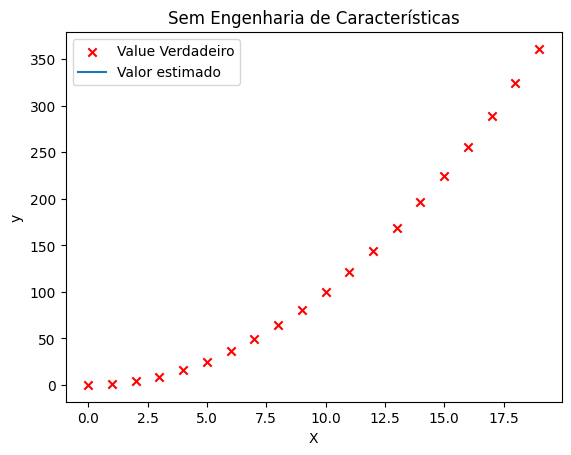

In [14]:
# inicializando parâmetros
w_inicial = np.array([0.0])
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters  = 2000
alpha      = 0.01
# Rodando o Método do gradiente
w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Sem Engenharia de Características")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Bem, como esperado, não obtivemos uma aproximação muito boa. O que precisamos é de algo como $y= w_0x_0^2 + b$, ou seja, de uma **característica polinomial** no nosso modelo.

Para obter isso, você pode modificar os *dados de entrada* para $criar$ as características desejadas. Abaixo, trocarmos `X` por `X**2` no código:

In [15]:
# Característica polinomial:
X = x**2
X = X.reshape(-1, 1) # X deve ser uma matriz 2-D

Iteração    0: Custo  7265.07   
Iteração 1000: Custo     0.00   
Iteração 2000: Custo     0.00   
Iteração 3000: Custo     0.00   
Iteração 4000: Custo     0.00   
Iteração 5000: Custo     0.00   
Iteração 6000: Custo     0.00   
Iteração 7000: Custo     0.00   
Iteração 8000: Custo     0.00   
Iteração 9000: Custo     0.00   
b,w encontrados pelo método do gradiente: 0.00,[1.] 


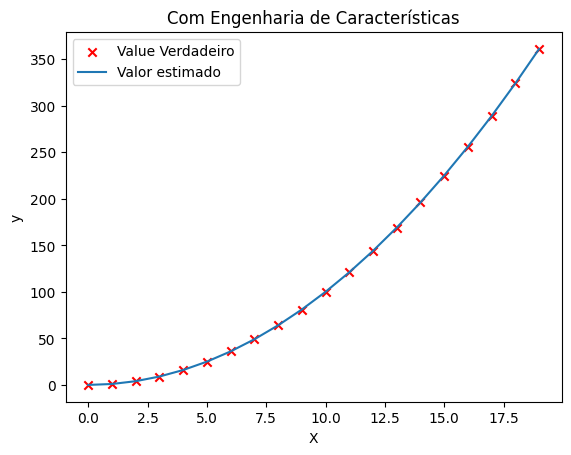

In [16]:
# inicializando parâmetros
w_inicial = np.array([0.0])
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters  = 10000
alpha      = 0.00001 # Veja que foi necessário reduzir o alpha drasticamente
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com Engenharia de Características")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Uma aproximação quase perfeita! Note que os valores obtidos para $\mathbf{w}$ e b foram: `b=0.05, w=1.004`.
O Método do Gradiente modificou nossos valores iniciais de forma a obter o modelo $y=0.05 + 1.004*x_0^2$, algo bem próximo do nosso alvo $y=1*x_0^2+1$.

### Selecionando Características

Acima, nós já sabíamos que o termo $x^2$ era necessário. Entretanto, nem sempre é óbvio quais características são necessárias. Uma ideia consiste em adicionar uma variedade de potenciais características para encontrar as mais úteis. Por exemplo, e se nós tentássemos: $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ?

Rodando as células abaixo

In [17]:
# Criando os dados
x = np.arange(0, 20, 1)
y = x**2

# potenciais características:
X = np.c_[x, x**2, x**3, x**4]  # a função c_ faz a concatenação.


Iteração    0: Custo 651569543.81   


/tmp/ipython-input-3970748209.py:17: RuntimeWarning: overflow encountered in scalar power
  custo = custo + (f_wb_i - y[i])**2     # escalar
/tmp/ipython-input-3970748209.py:41: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + erro * X[i, j]
/tmp/ipython-input-3970748209.py:41: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw[j] = dj_dw[j] + erro * X[i, j]


Iteração 1000: Custo      nan   
Iteração 2000: Custo      nan   
Iteração 3000: Custo      nan   
Iteração 4000: Custo      nan   
Iteração 5000: Custo      nan   
Iteração 6000: Custo      nan   
Iteração 7000: Custo      nan   
Iteração 8000: Custo      nan   
Iteração 9000: Custo      nan   
b,w encontrados pelo método do gradiente: nan,[nan nan nan nan] 


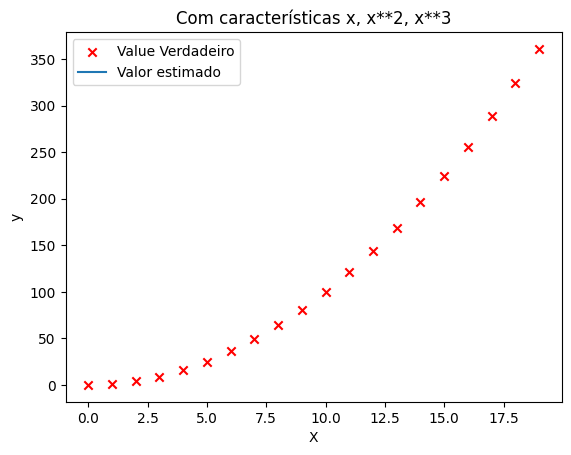

In [18]:
# inicializando parâmetros
m,n       = X.shape
w_inicial = np.zeros((n,))
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters  = 10000
alpha      = 0.0000001 # Veja que foi necessário reduzir o alpha ainda mais
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Note o valor de $\mathbf{w}$, `[0.08 0.54 0.03]` e b é `0.01`.Isso implica que o modelo após o treinamento é :
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.01 $$
O Método do Gradiente enfatizou que os dados são melhor explicados pelo termo $x^2$, aumentando o valor de $w_1$ em relação aos outros parâmetros.  
> O Método do Gradiente está escolhendo as características 'corretas' para nós enfatizando o parâmetro associado.

Vamos revisar as ideias principais:
- O valor menor para um parâmetro implica que esse parâmetro é menos importante. No caso extremo, quando o peso do parâmetro é zero ou muito próximo de zero, a característica associada é inútil para modelar os dados.
- Acima, após o treinamento, o peso associado com a característica $x^2$ foi muito maior que os pesos associados a $x$ ou $x^3$, uma vez que essa característica é a mais útil para explicar o comportamento dos dados

### Escalonamento de Características

Conforme descrito no último código, se os dados têm características com diferentes ordens de grandeza, é recomendável aplicar o escalonamento de características para tornar o processo de treinamento mais rápido. No exemplo acima, tem-se os termos $x$, $x^2$ e $x^3$, que naturalmente possuem escalas bastante diferentes. Vamos então aplicar a normalização Z-Score

In [19]:
# Criando os dados alvo
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3, x**4] # c_ concatena os dados
print(f"Intervalo pico a pico por característica/coluna nos dados originais  :{np.ptp(X,axis=0)}")


# Fazendo normalização Z-Score
X, X_mu, X_sigma = normalizacao_zscore(X)
print(X.shape)
print(f"Intervalo pico a pico por característica/coluna nos dados escalonados:{np.ptp(X,axis=0)}")

Intervalo pico a pico por característica/coluna nos dados originais  :[    19    361   6859 130321]
(20, 4)
Intervalo pico a pico por característica/coluna nos dados escalonados:[3.295 3.181 3.283 3.416]


Iteração    0: Custo  8639.80   
Iteração 3000: Custo     1.06   
Iteração 6000: Custo     0.16   
Iteração 9000: Custo     0.08   
Iteração 12000: Custo     0.08   
Iteração 15000: Custo     0.07   
Iteração 18000: Custo     0.07   
Iteração 21000: Custo     0.07   
Iteração 24000: Custo     0.07   
Iteração 27000: Custo     0.07   
b,w encontrados pelo método do gradiente: 123.50,[  5.514  87.403  38.817 -18.265] 


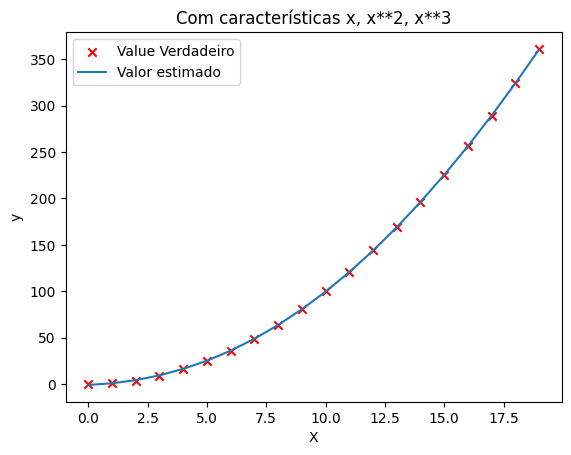

In [20]:
# inicializando parâmetros
m,n       = X.shape
w_inicial = np.zeros((n,))
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters  = 30000
alpha      = 0.1
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Novamente, após o treinamento, o peso associado com a característica $x^2$ é muito maior em comparação com os pesos associados com $x$ e $x^3$.

### Funções complexas

Com a engenharia de características, até mesmo funções complexas podem ser modeladas:

Iteração    0: Custo     0.22   
Iteração 50000: Custo     0.02   
Iteração 100000: Custo     0.02   
Iteração 150000: Custo     0.02   
Iteração 200000: Custo     0.02   
Iteração 250000: Custo     0.02   
Iteração 300000: Custo     0.02   
Iteração 350000: Custo     0.02   
Iteração 400000: Custo     0.02   
Iteração 450000: Custo     0.02   
b,w encontrados pelo método do gradiente: -0.01,[ -2.241  -4.795  17.578   4.077  -9.136 -12.086  -7.406  -0.068   6.064
   8.76    7.095   0.982  -9.197] 


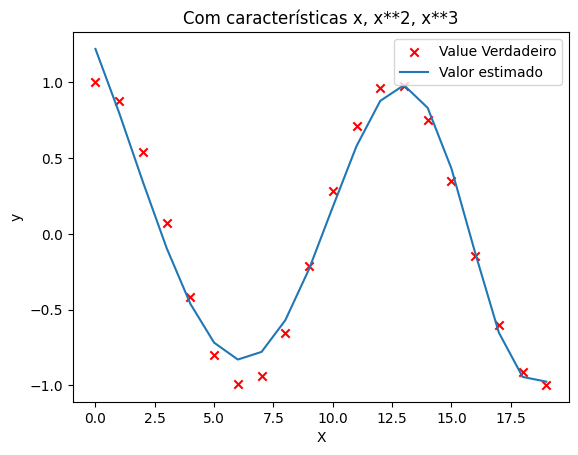

In [21]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X, X_mu, X_sigma = normalizacao_zscore(X)

# inicializando parâmetros
m,n       = X.shape
w_inicial = np.zeros((n,))
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters = 500000
alpha      = 0.1 # Veja que foi necessário reduzir o alpha ainda mais
# Rodando o Método do gradiente

w_final, b_final, J_hist = metodo_do_gradiente(X, y, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()



## Parabéns!
Com este código, você:
- aprendeu como a regressão linear é capaz de modelar funções complexas, até mesmo funções altamente não lineares usando engenharia de características
- reconheceu que é importante aplicar escalonamento de características ao fazer engenharia de características